### <U> 유니콘 기업의 정의 </U>  
#### 기업가치가 10억 달러 이상인 비상장 스타트업을 이르는 말 (출처 : 나무위키)
#### 인터넷을 검색하다보면 매출은 얼마 안되는 반면, 가치가 수천 억에 달하는 스타트업들을 종종 볼 수 있다. 
#### 기업 가치는 매출만으로 정해지지 않기 때문이다. 
#### 오히려 매출과 수익이 안정적으로 발생하는 기업이라면투자를 받을 이유가 덜할 것이다. 
#### 기업 가치 평가는 시장규모와 시장점유율, 현금 유동성, 기술 혁신성, 대표의 야망 등을
#### 종합적으로 고려하여 진행된다. 따라서 언제든지 아래 기업들의 순위가 뒤바뀔 가능성이 크다.

### 가설 설정
1. 5천개의 회사중에 5개의 기업을 찾아야 하므로 년도와 월 컬럼을 제외하고 LocalOutlierFactor를 사용해 데이터를 클러스터링 후 데이터의 특징을  
파악하면 유니콘 기업을 발굴할 수 있을 것이다.
2. 유니콘 기업으로 성장하기 위해서는 최소 3개년 이상 유지되어야 하며, 회사의 연매출액 증가율이 높은 기업이어야 할 것이다.
3. (월별매출액/ 월별직원수)를 구하면 직원당 생산성의 판단이 가능하므로, 이 지표가 최상위인 기업들이 기술기반 혁신기업인 유니콘  
    기업일 것이다.
4. 연금보험료는 임금과 연동되는 지표로 매출액/연금보험료는 회사입장에서 지급하는 임금당 생산성을 나타내는 지표이다. 이를 통해  
   같은 임금으로도 매출액을 증가시키는 고효율 인재들이 많은 기업을 찾을 수 있는 변수로 이 지표가 최상위 그룹에 속하면 유니콘  
   기업일 것이다.(양질의 인력의 지속적인 확보)
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df1=pd.read_csv('company_nps_data.csv',encoding='euc-kr')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


- 추가 변수 생성

In [4]:
df1['월별_매출액']=(df1.연매출액)/12

In [5]:
df1['직원의 생산성']=df1.월별_매출액/df1.월별_직원수

In [6]:
df1['임금당 생산성']=df1.월별_매출액/(df1.월별_연금보험료*0.09)

In [7]:
# 일 데이터가 없기 때문에 임의로 1로 추가함
df1['일'] = 1

In [8]:
df1.columns=['회사ID', '연매출액', 'year', 'month', '월별_연금보험료', '월별_직원수','월별_매출액','직원의 생산성','임금당 생산성','day']

In [9]:
# 날짜타입변환
df1['date']=pd.to_datetime(df1[['year','month','day']])
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,직원의 생산성,임금당 생산성,day,date
0,233757,41688077,2018,7,8912380,36,3.474006e+06,96500.178241,4.331062,1,2018-07-01
1,123464,1760695,2018,3,942380,5,1.467246e+05,29344.916667,1.729953,1,2018-03-01
2,342124,3221341,2018,7,781180,4,2.684451e+05,67111.270833,3.818228,1,2018-07-01
3,386420,4815584,2015,11,3795900,14,4.012987e+05,28664.190476,1.174655,1,2015-11-01
4,129243,9799736,2018,10,40724680,151,8.166447e+05,5408.242826,0.222809,1,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05,35080.469697,1.784468,1,2017-02-01
99797,239388,1045021,2018,10,1428800,9,8.708508e+04,9676.120370,0.677220,1,2018-10-01
99798,272304,181898,2018,3,392560,4,1.515817e+04,3789.541667,0.429040,1,2018-03-01
99799,362194,2100218,2018,12,874780,3,1.750182e+05,58339.388889,2.223012,1,2018-12-01


### 1. EDA


- 변수별 상관관계 파악

Text(0.5, 1, 'Feature Correlation')

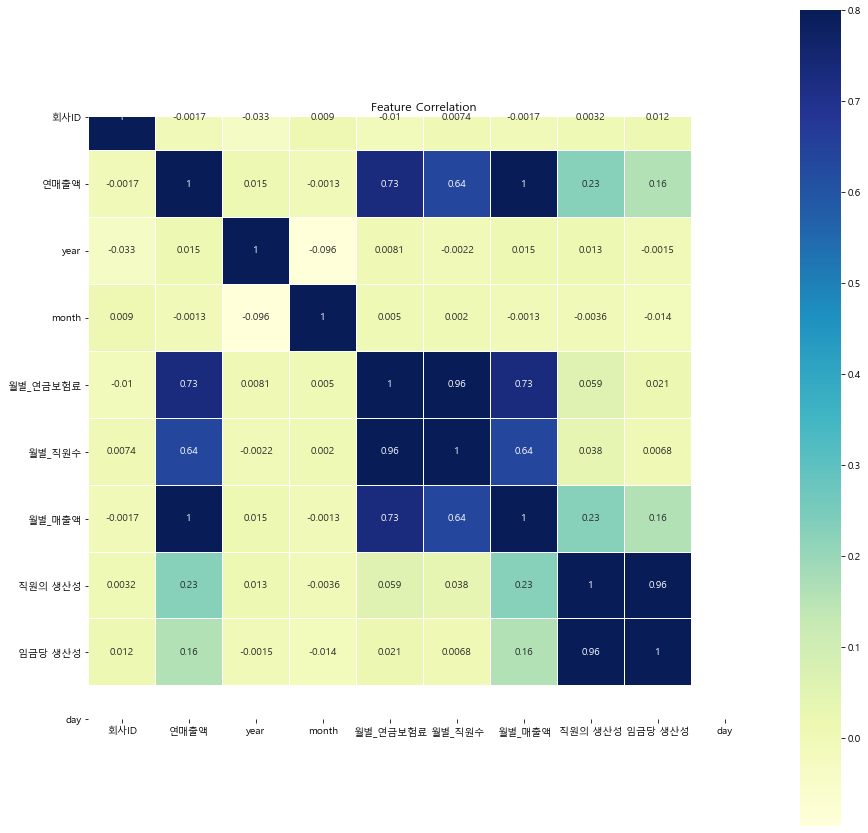

In [10]:
dcorr=df1.corr()
plt.figure(figsize=(15, 15));
sns.heatmap(dcorr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation')

<U>직원수가 많고 보험료를 많이 낼수록 매출액이 증가하는 상관관계를 보인다.</U>
즉, 상관관계만 보더라도 이 세가지 변수가 모두 높은 그룹이  
유니콘기업일 것이라는 가설이 더 신빙성이 있다.  
<br></br>
그러나, 박스플롯으로 매출액, 직원의 생산성, 보험료 등은 한쪽에 데이터가 너무 몰려있어 박스플롯이 이상하게 나온다.

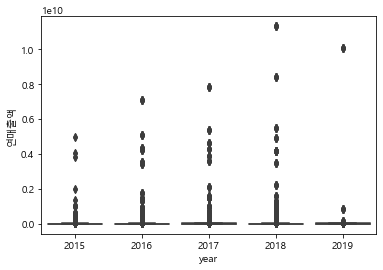

In [11]:
sns.boxplot(x='year',y='연매출액',data=df1)

In [12]:
df1.groupby(['회사ID','year'])['연매출액'].mean()

회사ID     year
63       2018    1.132878e+10
95       2018    6.569474e+08
102      2018    7.426589e+08
295      2018    8.377670e+07
414      2018    1.973277e+07
                     ...     
2400284  2018    1.263406e+06
2437574  2018    2.140160e+05
2693684  2019    2.380760e+05
3312354  2019    1.451563e+06
5159723  2019    2.591898e+06
Name: 연매출액, Length: 10111, dtype: float64

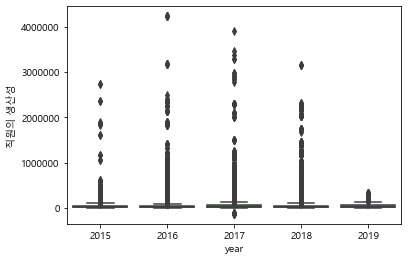

In [13]:
sns.boxplot(x='year',y='직원의 생산성',data=df1)

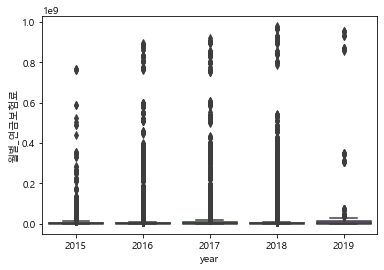

In [14]:
sns.boxplot(x='year',y='월별_연금보험료',data=df1)

- 실제 유니콘 회사들의 영업이력이 평균 5년정도 되므로, 최소 3년 이상의 기업만 필터링

In [15]:
y_count=df1.groupby('회사ID')['year'].count().loc[df1.groupby('회사ID')['year'].count()>=36].reset_index()

In [16]:
y_count.columns=['회사ID','y_count']

In [17]:
# 불필요한 행을 제외하기 위해 inner join 수행
df1=pd.merge(df1,y_count,on='회사ID')

- 밀도기반으로 이상값을 찾는 방법인 LocalOutlierFactor를 사용해 소수의 회사를 추출  
  (향후에 가설대로 추출한 유니콘 기업과 비교)

In [18]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.00125)
df1['outlier'] = lof.fit_predict(np.asmatrix(df1.drop(['year','month','date','day'],axis=1)))

In [19]:
len(df1.query("outlier==-1").회사ID.unique())

7

In [20]:
df1=df1.sort_values(by=['회사ID','year','month'])

### 2. 첫번째 가설인 '최소 3개년 이상 유지되는 회사의 연매출액 증가율이 높은 기업 추출'

In [21]:
# 3년 이상 운영한 회사의 연별 매출액의 성장률을 출력
tempt=df1.groupby(['회사ID','year'])['연매출액'].mean().reset_index()
tempt2=tempt.groupby('회사ID')['연매출액'].pct_change()
tempt=pd.concat([tempt,tempt2],axis=1)
tempt.columns=['회사ID','year','연매출액','연매출액gr']
tempt=tempt.fillna(0.0)
tempt

,회사ID,year,연매출액,연매출액gr
0,14271,2015,1199495.0,0.000000
1,14271,2016,4257715.0,2.549590
2,14271,2017,5005248.0,0.175571
3,14271,2018,8388401.0,0.675921
4,14271,2019,9039340.0,0.077600
...,...,...,...,...
4238,514934,2017,422440.0,0.099208
4239,514934,2018,556216.0,0.316675
4240,515264,2016,1489321.0,0.000000
4241,515264,2017,2074820.0,0.393132


In [22]:
# 3년이상 운영한 기업
tempt.연매출액gr.max()

56.793850589231845

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <a list of 10 Patch objects>)

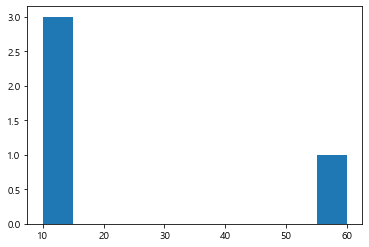

In [23]:
# 히스토그램을 통해 연매출액 증가율이 10%대에 데이터가 좀 있는 편이고 55% 이상으로  빈도가 크게 줄어든다는 것을 확인
plt.hist(tempt.연매출액gr,range=(10,60))

(array([745.,  78.,  23.,   7.,   5.,   2.,   1.,   1.,   1.,   0.]),
 array([ 0.2 ,  1.18,  2.16,  3.14,  4.12,  5.1 ,  6.08,  7.06,  8.04,
         9.02, 10.  ]),
 <a list of 10 Patch objects>)

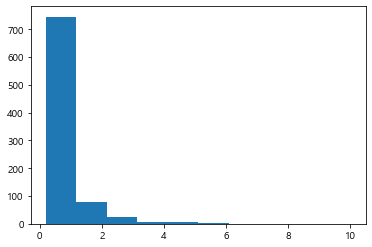

In [24]:
plt.hist(tempt.연매출액gr,range=(0.2,10))

- 매출성장률 기반 유니콘 후보기업 추출

In [25]:
# 연매출액증가율이 높은 기업이 유니콘 기업이라고 가정하였으므로 연매출액 증가율 최대값보다 조금 낮은 기준으로 기업 필터링
# 다만 직원당 생산성 성장률이나 임금당 생산성 성장률에 비해 매출액이 더 중요하다고 판단하여 더 넓은 범위를 잡음
sal_gr=tempt.query("연매출액gr>=1 ")['회사ID'].unique()
sal_gr

array([ 14271, 123882, 124386, 127366, 131485, 131723, 132029, 133493,
       134599, 135634, 136269, 136566, 137601, 137755, 138709, 140801,
       144925, 145177, 148537, 150455, 155877, 157470, 159105, 159487,
       161646, 163302, 163400, 169374, 171408, 172547, 175022, 175072,
       175766, 176840, 179828, 180401, 182436, 184654, 191123, 192166,
       192633, 199864, 206965, 207592, 209395, 231260, 231703, 232214,
       232779, 233340, 233757, 233957, 234300, 236378, 236539, 237381,
       237625, 238384, 238673, 239211, 240785, 241762, 242011, 243108,
       244133, 244226, 245286, 245643, 247210, 248177, 248936, 249702,
       250472, 250889, 251842, 254425, 254718, 254865, 257618, 259149,
       261685, 261973, 263195, 264568, 266016, 266692, 267549, 271386,
       272258, 272811, 273819, 280967, 284028, 286635, 294620, 294790,
       296209, 305146, 306768, 310835, 311024, 314638, 315746, 322227,
       331110, 332709, 335237, 376841, 382160, 403470, 403826, 404804,
      

### 3. 두번째 가설인 직원의 생산성이 높은 기업을 추출

In [26]:
# 직원 생산성은 월별로 측정가능한 변수이기 때문에 월별로 성장률을 구함
tempt=df1.groupby(['회사ID','year','month'])['직원의 생산성'].mean().reset_index()
tempt2=tempt.groupby(['회사ID','year'])['직원의 생산성'].pct_change()
tempt=pd.concat([tempt,tempt2],axis=1)
tempt.columns=['회사ID','year','month','연매출액','직원생산성gr']
tempt=tempt.fillna(0.0)
tempt

,회사ID,year,month,연매출액,직원생산성gr
0,14271,2015,11,9087.083333,0.000000
1,14271,2015,12,6663.861111,-0.266667
2,14271,2016,1,23653.972222,0.000000
3,14271,2016,2,25343.541667,0.071429
4,14271,2016,3,27293.044872,0.076923
...,...,...,...,...,...
42465,515264,2018,8,40373.416667,0.000000
42466,515264,2018,9,40373.416667,0.000000
42467,515264,2018,10,40373.416667,0.000000
42468,515264,2018,11,40373.416667,0.000000


In [27]:
tempt.직원생산성gr.max()

4.25

In [28]:
tempt.직원생산성gr.mean()

0.0018836544052751884

(array([2.2000e+02, 4.1678e+04, 5.3300e+02, 2.5000e+01, 8.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.77777778, -0.275     ,  0.22777778,  0.73055556,  1.23333333,
         1.73611111,  2.23888889,  2.74166667,  3.24444444,  3.74722222,
         4.25      ]),
 <a list of 10 Patch objects>)

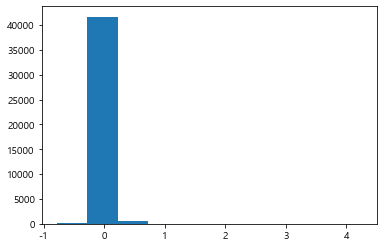

In [29]:
# 히스토 그램에 의해 직원생산성이 0을 중심으로 밀집되어 있으며 -값도 존재한다는 것을 확인
plt.hist(tempt.직원생산성gr)

(array([19.,  7.,  3.,  2.,  1.,  0.,  1.,  0.,  1.,  0.]),
 array([0.8 , 1.22, 1.64, 2.06, 2.48, 2.9 , 3.32, 3.74, 4.16, 4.58, 5.  ]),
 <a list of 10 Patch objects>)

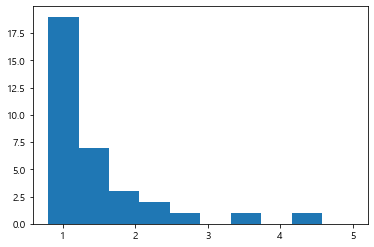

In [30]:
# 유니콘 기업을 찾기 위해 직원생산성이 높은 상위 그룹의 빈도 파악
plt.hist(tempt.직원생산성gr,range=(0.8,5))

- 직원 생산성 기반 유니콘 기업 후보 추출

In [31]:
# 유니콘 기업을 찾기 위해 직원생산성이 높은 상위 그룹중 적절한 빈도를 가진 생산성으로 필터링하여 회사 추출 
emppd_gr=tempt.query("직원생산성gr>=1.0 ")['회사ID'].unique()
emppd_gr

array([137889, 158148, 164870, 228565, 234427, 235976, 239075, 250300,
       264218, 268835, 302860, 315746, 331110, 386420, 396729, 404071,
       406133, 406912, 445254, 445499, 470994, 471146, 473265, 474900,
       507086], dtype=int64)

### 4. 마직막 가설인 임금당 생산성 증가율(양질의 인력의 지속적인 확보)로 유니콘 기업 후보 추출

In [32]:
# 임금당 생산성은 월별로 측정가능한 변수이기 때문에 월별로 성장률을 구함
tempt=df1.groupby(['회사ID','year','month'])['임금당 생산성'].mean().reset_index()
tempt2=tempt.groupby(['회사ID','year'])['임금당 생산성'].pct_change()
tempt=pd.concat([tempt,tempt2],axis=1)
tempt.columns=['회사ID','year','month','연매출액','임금당생산성gr']
tempt=tempt.fillna(0.0)
tempt

,회사ID,year,month,연매출액,임금당생산성gr
0,14271,2015,11,0.431848,0.000000
1,14271,2015,12,0.312085,-0.277325
2,14271,2016,1,1.173892,0.000000
3,14271,2016,2,1.254584,0.068739
4,14271,2016,3,1.306991,0.041772
...,...,...,...,...,...
42465,515264,2018,8,2.936898,0.000000
42466,515264,2018,9,2.936898,0.000000
42467,515264,2018,10,2.936898,0.000000
42468,515264,2018,11,2.936898,0.000000


In [33]:
tempt.임금당생산성gr.max()

3.537147969503657

In [34]:
tempt.임금당생산성gr.mean()

-0.0016574264424023006

(array([1.1300e+02, 3.9424e+04, 2.8450e+03, 6.0000e+01, 1.4000e+01,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.79279442, -0.35980018,  0.07319406,  0.5061883 ,  0.93918253,
         1.37217677,  1.80517101,  2.23816525,  2.67115949,  3.10415373,
         3.53714797]),
 <a list of 10 Patch objects>)

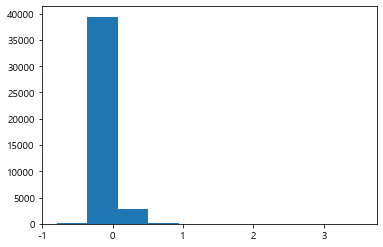

In [35]:
plt.hist(tempt.임금당생산성gr)

(array([9., 8., 3., 2., 2., 1., 0., 1., 1., 0.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

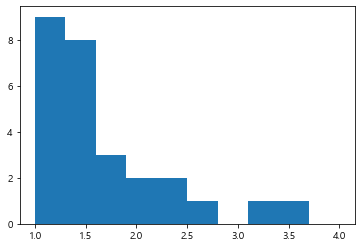

In [36]:
plt.hist(tempt.임금당생산성gr,range=(1,4))

### 5. 최종 유니콘 기업을 선정하기 위해 각 후보군의 교집합을 추출

In [37]:
# 유니콘 기업을 찾기 위해 임금당생산성이 높은 상위 그룹중 적절한 빈도를 가진 생산성으로 필터링하여 회사 추출 
pm_gr=tempt.query("임금당생산성gr>=1.5 ")['회사ID'].unique()
pm_gr

array([137889, 164870, 234427, 250300, 331110, 404071, 445499, 470994,
       473265, 474900, 507086], dtype=int64)

- 3개의 가설로 구한 회사 ID별 교집합 추출

In [38]:
# 매출액성장률
sol1=np.intersect1d(sal_gr, emppd_gr)
sol1

array([315746, 331110, 445499, 470994, 473265, 474900], dtype=int64)

In [39]:
sol2=np.intersect1d(sal_gr, pm_gr)
sol2

array([331110, 445499, 470994, 473265, 474900], dtype=int64)

### 6. 최종적으로 다음의 5개의 회사를 유니콘 기업으로 선정

In [40]:
sol3=np.intersect1d(sol1, sol2)
sol3

array([331110, 445499, 470994, 473265, 474900], dtype=int64)